## 实验介绍

### 1.实验内容

本实验包括: 
* 熟悉课程平台Jupyter实验环境
* 使用Matplotlib创建散点图

### 2.实验目标

通过实验熟悉课程平台环境，掌握Jupyter的基础操作

### 3.实验环境

* python 3.6.5
* numpy 1.13.3
* matplotlib 2.2.3

### 实验准备

点击屏幕右上方的下载实验数据模块，选择下载kNN_Dating.tgz到指定目录下，然后再依次选择点击上方的File->Open->Upload,上传刚才下载的数据集压缩包，再使用如下命令解压：

In [1]:
!tar -zxvf ../data/kNN_Dating.tgz

x kNN_Dating/
x kNN_Dating/datingTestSet.txt


In [2]:
import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

## 【绘制散点图】

## 实验步骤：【绘制散点图】- 概述

### 数据介绍
海伦收集约会数据已经有了一段时间，她把这些数据存放在文本文件datingTestSet.txt中，每个样本数据占据一行，总共有1000行。

海伦收集的样本数据主要包含以下3种特征：
* 每年获得的飞行常客里程数 (Number of frequent flyer miles earned per year)
* 玩视频游戏所消耗时间百分比 (Percentage of time spent playing video games)
* 每周消费的冰淇淋公升数 (Liters of ice cream consumed per week)

数据标签包含以下3类：
* 不喜欢的人 (didntLike)
* 魅力一般的人 (smallDoses)
* 极具魅力的人 (largeDoses)

### 数据示例
![](dataIntro.png)

## 实验步骤：【绘制散点图】- 数据读取与处理

将数据分类两部分，即特征矩阵和对应的分类标签向量。定义名为file2matrix的函数，以此来处理输入格式问题。编写代码如下：

In [3]:
def file2matrix(filename):
    """
    函数说明：加载数据集
    parameters:
        fileName - 文件名
    return:
        featureMat - 特征矩阵
        classLabelVector - 类别标签向量(didntLike - 0, smallDoses - 1, largeDoses - 2)
    """
    with open(filename) as f:
        lines = f.readlines()
        
    featureMat = []
    classLabelVector = []
    for line in lines:
        line = line.strip().split('\t')
        classLabel = line[-1]
        line_class = 0
        if classLabel == 'smallDoses':
            line_class = 1
        elif classLabel == 'largeDoses':
            line_class = 2
        classLabelVector.append(line_class)
        featureMat.append([float(x) for x in line[:-1]])
    featureMat = np.array(featureMat)
    classLabelVector = np.array(classLabelVector)
    
    return featureMat, classLabelVector
    

## 实验步骤：【绘制散点图】- 分析数据数据可视化 

### 预期可视化结果
![](ScatterPreview.png)

In [4]:
def showdatas(featureMat, classLabelVector):
    """
    函数说明：可视化数据集
    parameters:
        featureMat - 特征矩阵
        classLabelVector - 类别标签向量
    """
    # Extract columns
    frequentFlyerMiles = datingDataMat[:, 0]
    percentVideoGames = datingDataMat[:, 1]
    litersIceCream = datingDataMat[:, 2]

    # Map labels to colors
    label_color = {0: 'black', 1: 'orange', 2: 'red'}
    colors = [label_color[label] for label in datingLabels]

    # Create subplots
    fig, axs = plt.subplots(3, 1, figsize=(10, 12))

    # Plot 1: Video Games vs Frequent Flyer Miles
    for label, color, name in zip([0, 1, 2], ['black', 'orange', 'red'], ['didntLike', 'smallDoses', 'largeDoses']):
        axs[0].scatter(
            frequentFlyerMiles[datingLabels == label],
            percentVideoGames[datingLabels == label],
            c=color,
            label=name,
            s=15
        )
    axs[0].legend(loc='upper right')
    axs[0].set_xlabel('Number of frequent flyer miles earned per year')
    axs[0].set_ylabel('Percentage of time spent playing video games')
    
    # Plot 2: Ice Cream vs Frequent Flyer Miles
    for label, color, name in zip([0, 1, 2], ['black', 'orange', 'red'], ['didntLike', 'smallDoses', 'largeDoses']):
        axs[1].scatter(
            frequentFlyerMiles[datingLabels == label],
            litersIceCream[datingLabels == label],
            c=color,
            label=name,
            s=15
        )
    axs[1].legend(loc='upper right')
    axs[1].set_xlabel('Number of frequent flyer miles earned per year')
    axs[1].set_ylabel('Liters of ice cream consumed per week')

    # Plot 3: Ice Cream vs Video Games
    for label, color, name in zip([0, 1, 2], ['black', 'orange', 'red'], ['didntLike', 'smallDoses', 'largeDoses']):
        axs[2].scatter(
            percentVideoGames[datingLabels == label],
            litersIceCream[datingLabels == label],
            c=color,
            label=name,
            s=15
        )
    axs[2].legend(loc='upper right')
    axs[2].set_xlabel('Percentage of time spent playing video games')
    axs[2].set_ylabel('Liters of ice cream consumed per week')

    plt.tight_layout()
    plt.show()


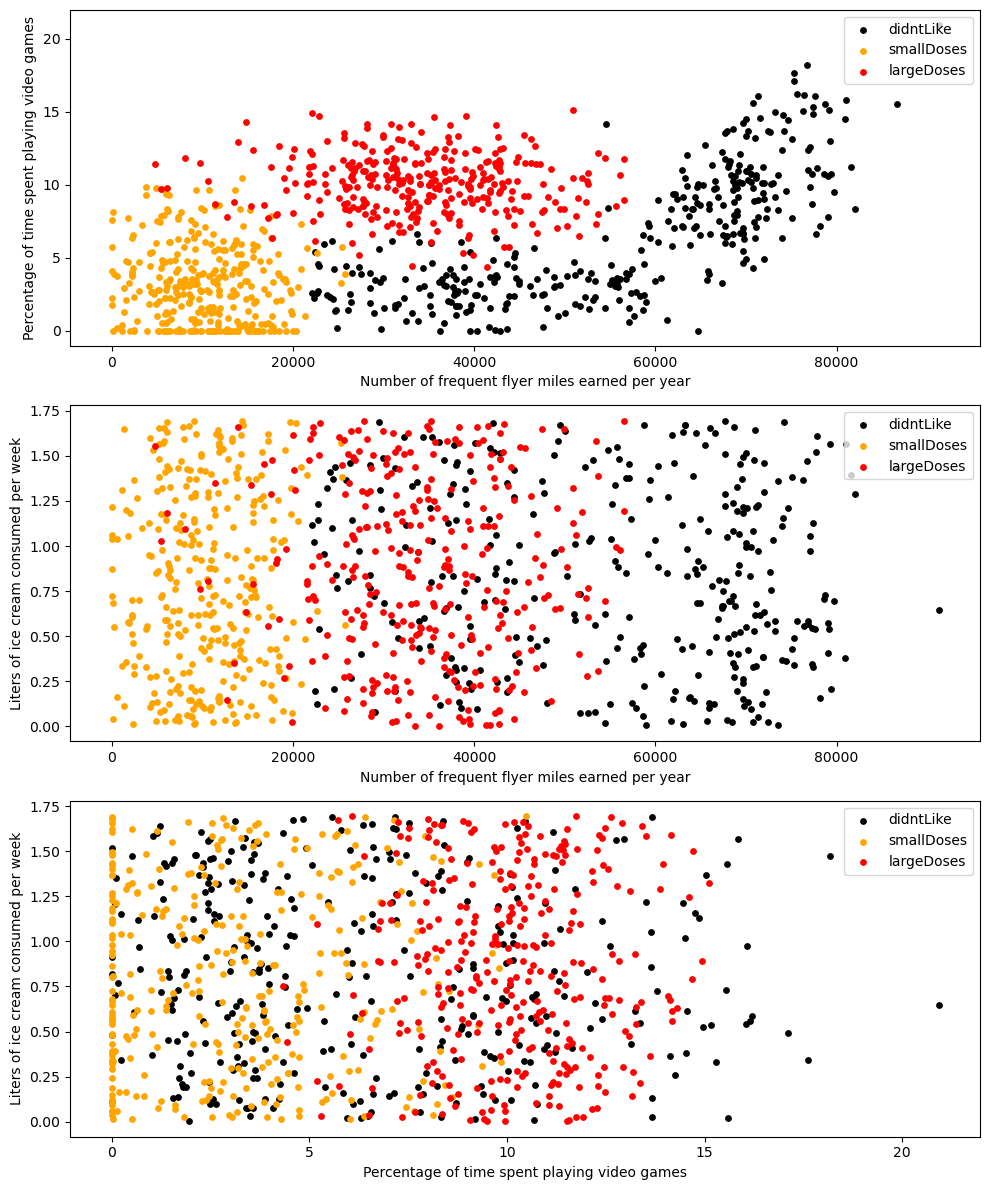

In [5]:
if __name__ == '__main__':
    filename = "kNN_Dating/datingTestSet.txt"
    datingDataMat, datingLabels = file2matrix(filename)
    showdatas(datingDataMat, datingLabels)

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# 假设已经有数据 Z_pca 和 y
# 这里提供一个示例数据
np.random.seed(42)
Z_pca = np.random.rand(100, 3)  # 示例数据：随机生成100个点，3个主成分
y = np.random.randint(0, 10, size=100)  # 示例标签：随机生成10个类

# 绘制三维散点图
print("绘制聚类结果...")
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(Z_pca[:, 0], Z_pca[:, 1], Z_pca[:, 2],
                     c=y, cmap='tab10', s=10, alpha=0.6)

# 添加颜色条
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("Cluster Label")

# 设置标题和标签
ax.set_title("KMeans Clustering of MNIST (PCA Reduced to 3D)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

# 显示网格
ax.grid(True)

# 启用交互式显示（手动旋转）
# plt.show()


绘制聚类结果...


<IPython.core.display.Javascript object>

In [13]:
!pip list | grep ipy

brotlipy                      0.7.0
ipykernel                     6.15.2
ipython                       7.31.1
ipython-genutils              0.2.0
ipywidgets                    7.6.5
scipy                         1.9.1
